In [1]:
# Import necessary packages here, e.g.
import numpy as np                     # for numerical operations
import matplotlib.pyplot as plt        # for plotting
import pandas as pd                    # for reading and manipulating data
from scipy import stats                # for statistical analysis
import cartopy.crs as ccrs             # for spatially plotting data
import cartopy.feature as cfeature     # for adding features to cartopy plots
from matplotlib.colors import LogNorm  # for adjusting cartopy color scale
import cmocean.cm as cmo               # for more color maps

# Heat Content's Effects on Bivalve Larvae Abundance 

### Ari Paulik 

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->

My goal for this project was to investigate the relationship between oceanic heat content and bivalve larvae abundance in the northwestern Atlantic ocean. I hypothesized (based on prior knowledge) that heat content would increase with time. Building off of this, I also hypothesized that heat content would have an inverse relationship with bivalve larvae abundance, meaning as heat content increases with time, larvae abundance will decrease. 
I chose to research bivalves because their shells are composed of calcium carbonate. Increased heat content causes increased oceanic temperature which allows more carbon to be stored in the water. Through a series of chemical reactions, this causes ocean acidification which decreases the amount of available calicum carbonate needed for constructing shells. Marine animals that depend on these shells for protection and structure typically see a decrease in populationn when there is an uptick in ocean acidification. For this reason, I thought bivalves might act as a good 'bioindicator' for heat content and that there might be a relationship between these two variables.


## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- Dataset 1: Heat Content
  - Downloaded from the EPA (Environmental Protection Agency) on November 13th, 2024
  - Data collection process: This data was gathered from several environmental organizations throughout the world. This means that the data collection process was not exactly the same between each organizations (different instruments were used between them). However, all instrumenets were deployed off of ships, planes, or through the use of underwater robots. Additionally, all data was collected throughout the upper 700 meters of the ocean.
  - Relevant variables included: 
    - Time in years
    - Heat content in Joules (scaled to 10e22)
  - Spatial coverage and resolution: global, calculated average of entire globe (very low resolution)
  - Temporal coverage and resolution: annual, 1955 - 2023
  - Obstacles to access data: Original downloaded file was encoded in a way that the program did not recognize so I had to research the pd.read_csv() function to figure out how to get the program to accept this type of encoding. There were a couple of columns of statistical data that I knew I wasn't going to use so I dropped those columns right after I read the dataset in. Additonally, I knew I was going to need to subset a specific range of years in order to match my other dataset so I had to convert the year column into integers and reset the index in order to filter these years.
  - URL to dataset: https://www.epa.gov/climate-indicators/climate-change-indicators-ocean-heat 
<br>
- Dataset 2: Bivalve Larvae Abundance
  - Downloaded from BCO-DMO (Biological and Chemical Oceanogrpahy Data Management Office) on  November 13th, 2024
  - Data collection process: Scientists surveyed tows in northwestern Atlantic Ocean covering 7 million miles within the research area. Scientists collected and individually identified a total of 261,000 samples throughout this study's time period.
  - Relevent variables included:
      - Time in days, months, and years (inconsistent gaps in time)
      - Latitude and longitude in degrees
      - Bivalve larvae abundance in individuals per 3 cubic meters
  - Spatial coverage and resolution: northwestern Atlantic Ocean, high resolution latitude and longitude (provided 6 decimal places of accuracy)
  - Temporal coverage and resolution: daily, 1958 - 2021 (low daily resolution/inconsistent, resampled annually)
  - Obstacles to access data: This dataset would have been too large to process if I didn't select certain columns to read in so I had to carefully choose only the columns I knew I was going to work with. Additionally, I noticed quite a few NaN values right away so I decided to drop these before they inevitably would become a problem later. Then, I ran into the problem that the temporal sampling of this dataset did not match that of my other dataset so this data needed to be resampled annually in order to properly compare these variables. The time column needed to be converted to datetime in order to do this.
  - URL to dataset: https://www.bco-dmo.org/dataset/765141

## 1. Changes in Heat Content Over Time

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

This section will use only one of my datasets regarding heat content (from the EPA), and will answer how heat content changes with time. The figure that will be produced will display global average heat content from 1958 - 2021 with a linear regression to show correlation and statistical significance.

In [2]:
# load data file(s)

# read data in using pandas
heat_df = pd.read_csv('ocean-heat-content.csv', # file name
                      parse_dates = True, # find which column corresponds to time
                      skiprows = 9, # skip 9 rows of text before data
                      header = None, # no header 
                      encoding = 'ISO-8859-1') # needed to specify file type to read file correctly
# Reading this data in at first was challenging because of the way the dataset was encoded. After researching the arguments of 
# pd.read_csv(), I was able to figure out how to combat this and get Python to read this data properly.

In [3]:
# perform data cleaning steps

# convert year column to numerical values so dates can be filtered easily later
heat_df_partialfil = pd.to_numeric(heat_df.iloc[:, 0])

# filter for specific years so dataset time frames match up in both years and length
new_heat_df = heat_df[(heat_df_partialfil >= 1958) & (heat_df_partialfil <= 2021)]

# drop other columns since I'm just looking at year and overall heat content
heat_df = new_heat_df.drop(columns = [1, 2, 3])

# drop years missing (NaN value years) from other dataset (this was deemed neccessary after cleaning other dataset)
final_heat_df = heat_df.drop([30, 31, 32, 33])

In [4]:
# perform data analysis

# perform linear regression for years and heat content
slope_time, intercept_time, rvalue_time, pvalue_time, stderr_time = stats.linregress(final_heat_df[0], final_heat_df[4]) # linear regression statistics for specified variables
x_vals_time = final_heat_df[0] # variable on x-axis
y_vals_time = x_vals_time * slope_time + intercept_time # linear equation for y-axis

# print statements for statistical analysis
print('The r-squared value for this regression is', round(rvalue_time**2, 3), ', which shows goodness of fit of the regression model')
print('The p-value for this regression is', round(pvalue_time, 3), ', which shows the probability of acheiving results just as or more extreme under the null hypothesis')

The r-squared value for this regression is 0.868 , which shows goodness of fit of the regression model
The p-value for this regression is 0.0 , which shows the probability of acheiving results just as or more extreme under the null hypothesis


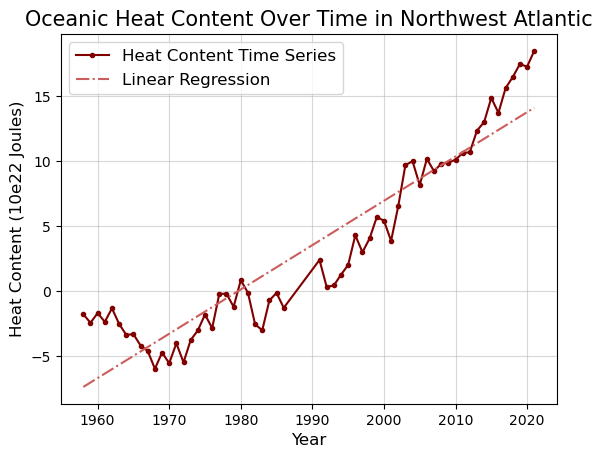

In [5]:
# make and display the first figure

# plot years and heat content
plt.plot(final_heat_df[0], final_heat_df[4], # variables
         color = 'maroon', marker = '.', # aesthetics
         label = 'Heat Content Time Series') # labels

# plot linear regression
plt.plot(x_vals_time, y_vals_time, # variables
         color = 'indianred', linestyle = '-.', # aesthetics
         label = 'Linear Regression') # labels

# labels
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Heat Content (10e22 Joules)', fontsize = 12)
plt.title('Oceanic Heat Content Over Time in Northwest Atlantic', fontsize = 15)
plt.grid(alpha = 0.5) # slightly transluscent gridlines
plt.legend(fontsize = 12)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** This figure highlights the relationship between time and ocean heat content. With an extremely low p-value and an r-squared value of 0.868, there is a relatively strong, positive, linear relationship between these two variables and can be ruled as a statistically signficant correlation.

## 2. Changes in Bivalve Larvae Abundance Over Time

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

This section will use only the dataset providing bivalve larvae abundance and will attempt to answer the question of how abundance changes with time. The figure produced will display an annual average of abundance from 1958 - 2021 with a linear regression to show statistical significance as well as a color map to display how heat content varies at the same time.

In [6]:
# if a new dataset, load data and perform data cleaning steps

# read data in using pandas
phyto_df = pd.read_csv('plankton-abundance.csv', # file name
                       usecols = ['Latitude', 'Longitude', 'Year', 'id_10590'], # use certain columns
                       delimiter = ',') # note separation method

# Get rid of NaN values before they become a problem
clean_phyto = phyto_df.dropna()
# I didn't have this here to begin with and ran into a slew of errors because of it so I decided to add this in at the beginning
# so it couldn't possibly cause problems later

# Convert 'Year' column to datetime, formatted only as a year
phyto_df_dt = pd.to_datetime(clean_phyto['Year'], format = '%Y')

# reset index to datetime index so that data can be resampled
phyto_df.set_index(phyto_df_dt, inplace = True)

# resample data for annual averages/mean (other dataset is in annual format)
phyto_df_annual = phyto_df.resample('YS').mean()

In [7]:
# perform data analysis

# define variables 
phyto_abund = phyto_df['id_10590'].values # abundance values
x = final_heat_df[0] # year
y = phyto_df_annual['id_10590'].dropna() # NaN removed annually resampled abundance
heat = final_heat_df[4] # for colorbar-heat content

# perform linear regression
slope_year, intercept_year, rvalue_year, pvalue_year, stderr_year = stats.linregress(x, y) # linear regression statistics for specified variables
x_vals_year = x # variable on x-axis
y_vals_year = x_vals_year * slope_year + intercept_year # linear equation for y-axis

# print statements for statistical analysis
print('The r-squared value for this regression is', round(rvalue_year**2, 3), ', which shows goodness of fit of the regression model')
print('The p-value for this regression is', round(pvalue_year, 3), ', which shows the probability of acheiving results just as or more extreme under the null hypothesis')

The r-squared value for this regression is 0.001 , which shows goodness of fit of the regression model
The p-value for this regression is 0.849 , which shows the probability of acheiving results just as or more extreme under the null hypothesis


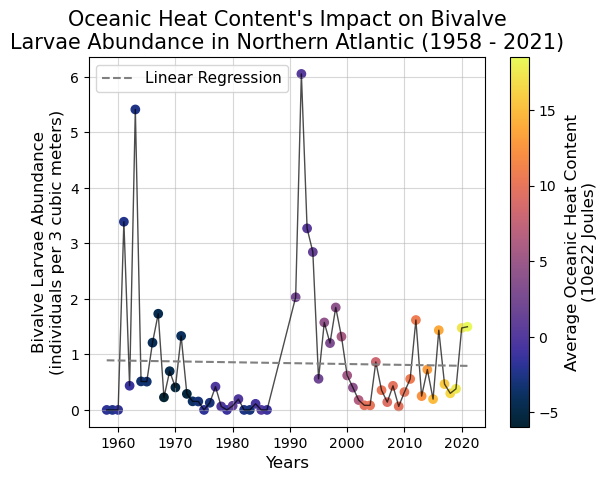

In [8]:
# make and display figure

# create empty plot
fig, axs = plt.subplots()

# Scatter plot with colormap for z values
scatter = plt.scatter(x, y, c = heat, # variables and color map
                      cmap = 'cmo.thermal') # aesthetics

# plot line (connects dots from needed scatter format)
plt.plot(x, y, # variables
         color = 'black', linestyle = '-', linewidth = 1, alpha = 0.7) # aesthetics

# plot linear regression
plt.plot(x_vals_year, y_vals_year, # variables
         color = 'grey', linestyle = '--', # aesthetics
         label = 'Linear Regression') # labels

# labels
axs.set_xlabel('Years', fontsize = 12)
axs.set_ylabel('Bivalve Larvae Abundance\n(individuals per 3 cubic meters)', fontsize = 12)
axs.set_title("Oceanic Heat Content's Impact on Bivalve\nLarvae Abundance in Northern Atlantic (1958 - 2021)", fontsize = 15)
plt.colorbar(scatter, ax = axs).set_label('Average Oceanic Heat Content\n(10e22 Joules)', fontsize = 12)
plt.grid(alpha = 0.5) # slightly transluscent gridlines
plt.legend(fontsize = 11)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** This figures shows that there is very little correlation between these time and bivalve larvae abundance. There are several outliers within this data which could be skewing these results, but regardless, with an r-squared value of 0.001 (extremely low) and a p-value of 0.849 (extremely high), this correlation is very statistically insignificant.

## 3. Heat Content's Impact on Bivalve Larvae Abundance 

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

In this section, I will be working with both datasets and attempting to answer how heat content impacts abundance in the northwestern Atlantic. The figure produced will show variations between heat and abundance using a scatter plot. The figure will have a linear regression and lines indicating where data means lie.

In [9]:
# perform data analysis

# define mean value variables
mean_x = np.mean(final_heat_df[0]) # mean values of year
mean_y = np.mean(phyto_df_annual['id_10590']) # mean values of annual abundance data

# perform linear regression
slope_abund, intercept_abund, rvalue_abund, pvalue_abund, stderr_abund = stats.linregress(heat, y) # regression statistics for specific variables
x_vals_abund = heat # variable for x-axis
y_vals_abund = x_vals_abund * slope_abund + intercept_abund # linear regression equation for y-axis

print('The r-squared value for this regression is', round(rvalue_abund**2, 3), ', which shows goodness of fit of the regression model')
print('The p-value for this regression is', round(pvalue_abund, 3), ', which shows the probability of acheiving results just as or more extreme under the null hypothesis')

The r-squared value for this regression is 0.003 , which shows goodness of fit of the regression model
The p-value for this regression is 0.661 , which shows the probability of acheiving results just as or more extreme under the null hypothesis


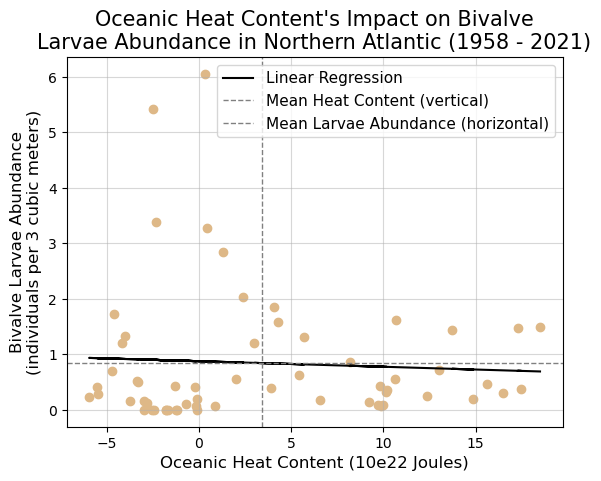

In [10]:
# make and display figure

# create a scatter plot with raw data
plt.scatter(heat, y, # variables
            color = 'burlywood') # aesthetics

# plot linear regression
plt.plot(x_vals_abund, y_vals_abund, # variables
         color = 'black', linestyle = '-', # aethetics
         label = 'Linear Regression') # labels

# add lines indicating means
plt.axvline(np.mean(heat), # variable
            color='grey', linestyle='--', linewidth=1, # aesthetics
            label = 'Mean Heat Content (vertical)') # labels
plt.axhline(np.mean(y), # variable
            color = 'grey', linestyle = '--', linewidth = 1, # aesthetics
            label = 'Mean Larvae Abundance (horizontal)') # labels
# I knew I wanted lines representing the means on this graph but didn't know how to accomplish this so I researched functions on 
# matplotlib and eventually came up with plt.axvline() and plt.axhline()

# labels
plt.xlabel('Oceanic Heat Content (10e22 Joules)', fontsize = 12)
plt.ylabel('Bivalve Larvae Abundance\n(individuals per 3 cubic meters)', fontsize = 12)
plt.title("Oceanic Heat Content's Impact on Bivalve\nLarvae Abundance in Northern Atlantic (1958 - 2021)", fontsize = 15)
plt.grid(alpha = 0.5)
plt.legend(fontsize = 11)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3 Caption:** This figure highlights the lack of a relationship between heat content and bivalve larvae abundance. While the lines denoting the means reveal that most of the outliers occur during a lower heat content, the linear regression, with an r-squared value of 0.003 and a p-value of 0.661, reveals that these variables are not significantly correlated.

## 4. Comprehensive Comparison

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

In this section, I will overlay all of my results using both datasets to further show the relationship between researched variables. This figure will display both heat content and bivalve larvae abundance over time with their respective linear regressions.

In [11]:
# perform data analysis

# perform linear regression for bivalve larvae abundance time series
slope_year, intercept_year, rvalue_year, pvalue_year, stderr_year = stats.linregress(x, y) # regression statistics for specified variables (same for below)
x_vals_year = x # variable for x-axis (same for below)
y_vals_year = x_vals_year * slope_year + intercept_year # linear regression equation for y-axis (same for below)

# perform linear regression for heat content time series
slope_time, intercept_time, rvalue_time, pvalue_time, stderr_time = stats.linregress(final_heat_df[0], final_heat_df[4])
x_vals_time = final_heat_df[0]
y_vals_time = x_vals_time * slope_time + intercept_time

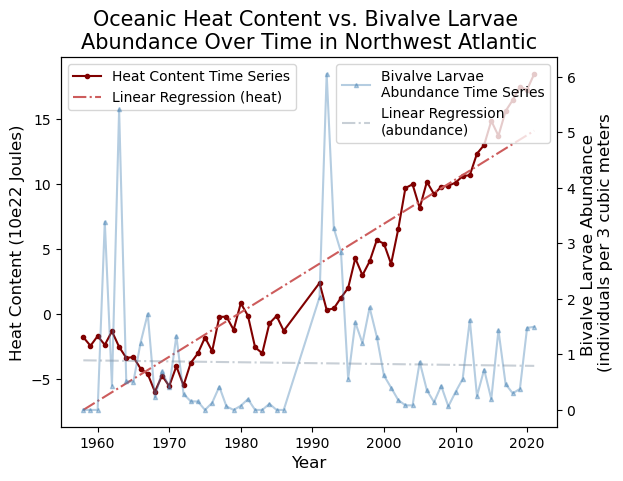

In [12]:
# make and display figure

# create empty plot
fig, ax1 = plt.subplots()

# plot years and heat content on normal axes
ax1.plot(final_heat_df[0], final_heat_df[4], # variables
         color = 'maroon', marker = '.', # aesthetics
         label = 'Heat Content Time Series') # labels

# plot linear regression for time and heat content (from earlier plot) on normal axes
ax1.plot(x_vals_time, y_vals_time, # variables
         color = 'indianred', linestyle = '-.', # aesthetics
         label = 'Linear Regression (heat)') # labels

# labels
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Heat Content (10e22 Joules)', fontsize = 12)
ax1.set_title('Oceanic Heat Content vs. Bivalve Larvae \nAbundance Over Time in Northwest Atlantic', fontsize = 15)
ax1.legend()

# add new y-axis opposite to other y-axis with different units
ax2 = ax1.twinx()

# plot years and bivalve larvae abundance on alternate axes
ax2.plot(final_heat_df[0], y, # variables 
         color = 'steelblue', marker = '^', markersize = 3, alpha = 0.4, # aesthetics
         label = 'Bivalve Larvae \nAbundance Time Series') # labels

# plot linear regression for time and larvae abundance (from earlier plot) on alternate axes
ax2.plot(x_vals_year, y_vals_year, # variables
         color = 'lightslategrey', linestyle = '-.', alpha = 0.4, # aesthetics
         label = 'Linear Regression \n(abundance)') # labels

# labels
ax2.set_ylabel('Bivalve Larvae Abundance \n(individuals per 3 cubic meters', fontsize = 12)
ax2.legend()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 4 Caption:** This figure confirms the conclusions individually reached by the above plots. Heat content generally increases with time while yearly progression has no impact on abundance. And finally, the difference in linear regressions highlights how there's no correlation between heat content and abundance.

## Discussion
**Interpretation of Results:** 
<!-- Summarize what you learned from each data analysis section/figure. Discuss key insights and conclusions regarding your research question. Do your results support or contradict your hypothesis? -->

From the first figure, I learned that there is a positive correlation between time and heat content around the world that can be ruled statistically significant, despite yearly fluctuations. This means that generally, as the years go by, the heat content in the upper 700 meters of the ocean increases. This matched my hypothesis for my first research question. The next step was to keep this independent variable of time, but change the dependent variable to bivalve larvae abundance in order to ease into my second scientific question. This figure yielded information suggesting that time has no impact on larvae abundance with a relatively flat regression line, indicating no statistical significance. Similar things can be stated for my third figure comparing heat content and larvae abundance. While the slope of the regression increased just slightly, there is still no correlation between these two variables. These findings went against my hypothesis. I did find it interesting though that all of the outliers and higher abundance values were found before the mean heat content value. It is inconclusive if this is a product of sampling error, noise, or true values, but regardless, this is not an accepted form of statistical analysis, just an interesting observation. Finally, the last figure further drives home the point that all of these variables, aside from the strong correlation between time and heat content, have little to no relationship.

**Limitations and Future Work:**
<!-- Identify limitations in your analysis. Discuss any factors that may have impacted the validity or reliability of your results (e.g., data quality, sample size, assumptions). -->
<!-- What next steps could you or another researcher take to continue investigating this research question? Suggest ideas for further research, data collection, or alternative methodologies that could enhance understanding of the topic. -->
There were quite a few limitations regarding my data and analysis throughout this project. First, the resolution of my heat content dataste was fairly poor as it was a measure of a global average. This means that one value is being used to represent the entire ocean's heat content over an entire year. That said, this number is not neccessarily accurate for the region studied during this project. Rather, it was assumed that this global average would be a 'good enough' value to compare against my dependent variable. Additionally, when I resampled my larvae abundance data for annual means, I was making an assumption that each year had the same number of data points so the data wouldn't be skewed once resampled. This may not have been true, which could have potentially introduced a confounding variable to this project. Finally, the larvae abundance data was collected mostly through the use of scientific volunteers which could introduce some human error into this dataset, especially as technologies change over the time period of this project. 
Some next steps for this project could include expanding the spatial boundaries and researching other possible explanations. Looking into this relationship in other parts of the world could help diagnose if this is a real result everywhere or if this specific area is an anomaly in that way. If this same project's result is found in other areas of the world, it could be worth looking into other variables such as salinity, carbon concentration, etc. that could instead better explain the variation in larvae abundance.

## References  

Biological and Chemical Oceanography Data Management Office. (Novemeber 13th, 2024). *Dataset: CPR plankton abundance in the WN Atlantic 1958-2021*. https://www.bco-dmo.org/dataset/765141

United States Environmental Protection Agency. (November 13th, 2024). *Climate Change Indicators: Ocean Heat*. https://www.epa.gov/climate-indicators/climate-change-indicators-ocean-heat

pandas. (November 13th, 2024). *pandas.DataFrame.set_index*. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

pandas. (November 18th, 2024). *pandas.DataFrame.to_csv*. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

matplotlib. (November 21st, 2024). *matplotlib.pyplot.axhline*. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html

matplotlib. (November 21st, 2024). *matplotlib.pyplot.axvline*. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html

pandas. (November 22nd, 2024). *matplotlib.axes.Axes.twinx*. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html

